In [2]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [4]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L103100', 'L103300', 'L103000', 'SEX', 'S000300', 'L190300', 'L100500', 'L100700', 
#                        'L190400', 'S000100', 'L190500', 'L101300', 'S000501', 'L103800', 'L103700', 'L100800', 'L101400', 
#                        'S000502', 'L101600','FIELD_33',  'FIELD_40', 'FIELD_21', 'FIELD_29', 
#                        'FIELD_38', 'FIELD_41', 'FIELD_14', 'FIELD_42', 'FIELD_27', 'FIELD_31', 'AGE'
# #                        'FIELD_6', 'FIELD_7',
#                       ]]

# y_original=y_original[['Unnamed: 0','L103100', 'L103300', 'L103000', 'SEX', 'S000300', 'L190300', 'L100500', 'L100700', 
#                        'L190400', 'S000100', 'L190500', 'L101300', 'S000501', 'L103800', 'L103700', 'L100800', 'L101400', 
#                        'S000502', 'L101600','FIELD_33',  'FIELD_40', 'FIELD_21', 'FIELD_29', 
#                        'FIELD_38', 'FIELD_41', 'FIELD_14', 'FIELD_42', 'FIELD_27', 'FIELD_31', 'AGE'
# #                        'FIELD_6', 'FIELD_7',
#                       ]]

x_original=x_original[['Unnamed: 0','L103100','L103300','L103000','S000300','FIELD_38','AGE','L100800','L100700' ]]

y_original=y_original[['Unnamed: 0','L103100', ]]

print(x_original.shape)
print(y_original.shape)


(159381, 9)
(159381, 2)


In [5]:
for index,col in enumerate(x_original.columns):
    print(col,x_original[col].dropna().shape[0])

Unnamed: 0 159381
L103100 158880
L103300 135222
L103000 158939
S000300 159075
FIELD_38 159077
AGE 159381
L100800 159236
L100700 152474


Prepare the data
============

In [8]:
# df=x_original.copy()
# conditions = [
#     (df.S000501 < 120)  ,
#     (df.S000501 >= 120) & (df.S000501 < 130),
#     (df.S000501 >=130)]
# choices = [0,1,2]
# df['sbpG'] = np.select(conditions, choices, default=0)
# df.head()
# x_original=df.copy()

# conditions2 = [
#     (df.S000502 < 80)  ,
#     (df.S000502 >= 80) & (df.S000502 < 90),
#     (df.S000502 >=90)]
# choices2 = [0,1,2]
# df['dbpG'] = np.select(conditions2, choices2, default=0)
# df.head()
# x_original=df.copy()

# conditions3 = [
#     (df.AGE < 30)  ,
#     (df.AGE >= 30) & (df.AGE < 40),
#     (df.AGE >= 40) & (df.AGE < 50),
#     (df.AGE >= 50) & (df.AGE < 60),
#     (df.AGE >= 60)]
# choices3 = [0,1,2,3,4]
# df['AgeG'] = np.select(conditions3, choices3, default=0)
# df.head()
# x_original=df.copy()


# conditions4 = [
#     (df.L100800 < 100)  ,
#     (df.L100800 >= 100) & (df.L100800 < 126), 
#     (df.L100800 >= 126)]
# choices4 = [0,1,2]
# df['CLASS'] = np.select(conditions4, choices4, default=0)
# df.head()
# x_original=df.copy()

In [9]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

# data=data[data.L100800_y <200]

print(data.shape)

(128620, 11)


In [10]:
print(data.shape)
print(data.columns)
data.head()

(128620, 11)
Index(['index', 'Unnamed: 0', 'L103100_x', 'L103300', 'L103000', 'S000300',
       'FIELD_38', 'AGE', 'L100800', 'L100700', 'L103100_y'],
      dtype='object')


,index,Unnamed: 0,L103100_x,L103300,L103000,S000300,FIELD_38,AGE,L100800,L100700,L103100_y
0,0,0,68.0,3.1,53.0,20.1,1.0,44.0,77.0,3.0,71.0
1,1,1,71.0,3.3,53.0,19.7,1.0,45.0,89.0,3.0,72.0
2,2,2,72.0,3.4,41.0,20.2,2.0,46.0,78.0,3.8,76.0
3,3,3,64.0,2.8,58.0,24.8,0.0,51.0,95.0,3.7,58.0
4,4,4,58.0,2.9,50.0,25.5,0.0,52.0,90.0,3.4,67.0


In [11]:
# x=data[['L103100_x', 'L103300_x', 'L103000_x', 'SEX_x', 'S000300_x', 'L190300_x', 'L100500_x', 'L100700_x', 
#                        'L190400_x', 'S000100_x', 'L190500_x', 'L101300_x', 'S000501_x', 'L103800_x', 'L103700_x', 'L100800_x', 'L101400_x', 
#                        'S000502_x', 'L101600_x','FIELD_33_x',  'FIELD_40_x', 'FIELD_21_x', 'FIELD_29_x', 
#                        'FIELD_38_x', 'FIELD_41_x', 'FIELD_14_x', 'FIELD_42_x', 'FIELD_27_x', 'FIELD_31_x', 'AGE_x',
#         'CLASS','sbpG','dbpG','AgeG']]

# y=data[['L103100_y', 'L103300_y', 'L103000_y', 'SEX_y', 'S000300_y', 'L190300_y', 'L100500_y', 'L100700_y', 
#                        'L190400_y', 'S000100_y', 'L190500_y', 'L101300_y', 'S000501_y', 'L103800_y', 'L103700_y', 'L100800_y', 'L101400_y', 
#                        'S000502_y', 'L101600_y','FIELD_33_y',  'FIELD_40_y', 'FIELD_21_y', 'FIELD_29_y', 
#                        'FIELD_38_y', 'FIELD_41_y', 'FIELD_14_y', 'FIELD_42_y', 'FIELD_27_y', 'FIELD_31_y', 'AGE_y'
#         ]]

x=data[['L103100_x', 'L103300','L103000','S000300','FIELD_38','AGE','L100800','L100700']]

y=data[['L103100_y' ]]

Check the correlation of the selected feature with the independent variables
=====

In [12]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L103100_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [13]:
corval.y

y            1.000000
L103100_x    0.783116
L103300      0.631790
S000300      0.386041
L103000      0.383398
L100700      0.349224
L100800      0.209074
AGE          0.115655
FIELD_38     0.000650
Name: y, dtype: float64

In [14]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [15]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [16]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [17]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [18]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [19]:
# x.columns

Random Forest Regressor
=============

In [20]:
ylable=y[['L103100_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [21]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[9.67134142e-01 5.22598506e-03 3.53613708e-03 4.55893255e-03
 6.71525417e-04 1.38213308e-03 2.99798651e-03 1.44931587e-02]


mean_squared_error 74.27732345035498
root mean_squared_error 8.618429291370614
mean_absolute_error 6.5612771416175475
r2_score 0.6281896328345709


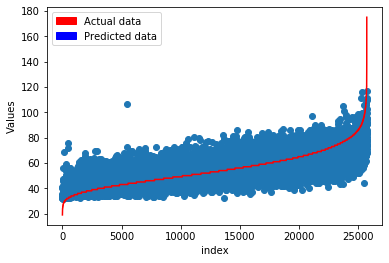

,t + 1,pred (t +1)
12640,123.0,95.350450
13601,124.0,99.776202
11912,125.0,111.047319
21798,126.0,90.380635
7711,126.0,94.672191
15766,127.0,75.198994
11034,135.0,82.741931
4096,138.0,67.773020
20290,159.0,102.909587
25003,175.0,116.485055


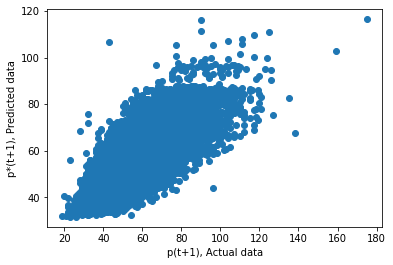

In [22]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [23]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [24]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [25]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[04:02:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [26]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 73.5289759195828
root mean_squared_error 8.574903843168318
mean_absolute_error 6.525504294570284
r2_score 0.6319356397887622


In [27]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [59]:
model= Sequential()
model.add(Dense(input_dim=34,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
# model.add(BatchNormalization())
# model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [60]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

Train on 9624 samples, validate on 2406 samples
Epoch 1/100
9624/9624 [==============================] - 1s 103us/step - loss: 2860.3370 - mean_squared_error: 2860.3370 - val_loss: 2136.0533 - val_mean_squared_error: 2136.0533
Epoch 2/100
9624/9624 [==============================] - 0s 26us/step - loss: 510.4216 - mean_squared_error: 510.4216 - val_loss: 286.7814 - val_mean_squared_error: 286.7814
Epoch 3/100
9624/9624 [==============================] - 0s 26us/step - loss: 322.7037 - mean_squared_error: 322.7037 - val_loss: 190.8061 - val_mean_squared_error: 190.8061
Epoch 4/100
9624/9624 [==============================] - 0s 26us/step - loss: 285.8393 - mean_squared_error: 285.8393 - val_loss: 1173.7380 - val_mean_squared_error: 1173.7380
Epoch 5/100
9624/9624 [==============================] - 0s 26us/step - loss: 253.6345 - mean_squared_error: 253.6345 - val_loss: 14396.2846 - val_mean_squared_error: 14396.2846
Epoch 6/100
9624/9624 [==============================] - 0s 24us/step -

Epoch 48/100
9624/9624 [==============================] - 0s 27us/step - loss: 111.8485 - mean_squared_error: 111.8485 - val_loss: 93.0641 - val_mean_squared_error: 93.0641
Epoch 49/100
9624/9624 [==============================] - 0s 25us/step - loss: 112.8032 - mean_squared_error: 112.8032 - val_loss: 115.8166 - val_mean_squared_error: 115.8166
Epoch 50/100
9624/9624 [==============================] - 0s 25us/step - loss: 112.9549 - mean_squared_error: 112.9549 - val_loss: 103.7584 - val_mean_squared_error: 103.7584
Epoch 51/100
9624/9624 [==============================] - 0s 27us/step - loss: 111.7061 - mean_squared_error: 111.7061 - val_loss: 101.3116 - val_mean_squared_error: 101.3116
Epoch 52/100
9624/9624 [==============================] - 0s 26us/step - loss: 110.4159 - mean_squared_error: 110.4159 - val_loss: 97.5460 - val_mean_squared_error: 97.5460
Epoch 53/100
9624/9624 [==============================] - 0s 27us/step - loss: 109.3584 - mean_squared_error: 109.3584 - val_loss

9624/9624 [==============================] - 0s 25us/step - loss: 110.7153 - mean_squared_error: 110.7153 - val_loss: 136.6962 - val_mean_squared_error: 136.6962
Epoch 96/100
9624/9624 [==============================] - 0s 25us/step - loss: 110.9794 - mean_squared_error: 110.9794 - val_loss: 111.1936 - val_mean_squared_error: 111.1936
Epoch 97/100
9624/9624 [==============================] - 0s 25us/step - loss: 111.2335 - mean_squared_error: 111.2335 - val_loss: 98.8974 - val_mean_squared_error: 98.8974
Epoch 98/100
9624/9624 [==============================] - 0s 25us/step - loss: 109.0044 - mean_squared_error: 109.0044 - val_loss: 108.0141 - val_mean_squared_error: 108.0141
Epoch 99/100
9624/9624 [==============================] - 0s 25us/step - loss: 110.5251 - mean_squared_error: 110.5251 - val_loss: 98.0837 - val_mean_squared_error: 98.0837
Epoch 100/100
9624/9624 [==============================] - 0s 24us/step - loss: 110.4582 - mean_squared_error: 110.4582 - val_loss: 160.0395 -

In [61]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 166.06552812965217
root mean_squared_error 12.886641460429175
mean_absolute_error 9.529440167102408
r2_score 0.14242285246462394


,t + 1,pred (t +1)
0,80.0,69.716156
1,103.0,60.330444
2,47.0,49.057709
3,60.0,50.022259
4,54.0,58.381298
5,70.0,54.491722
6,58.0,53.914780
7,61.0,52.649265
8,36.0,44.397129
9,78.0,59.885746


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


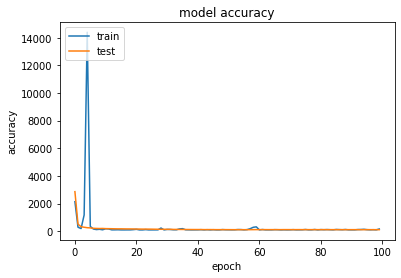

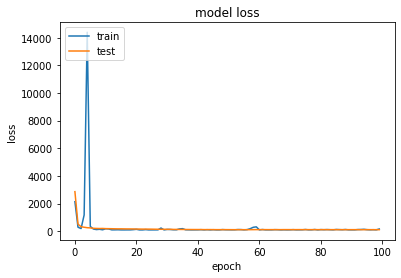

In [62]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

9.529440167102408
8.674981166046837
37.30053191489362


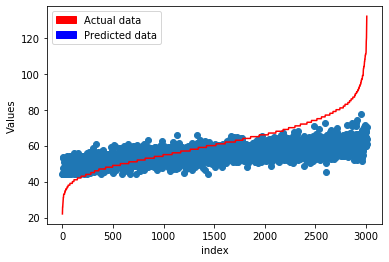

,t + 1,pred (t +1),diff
609,22.0,44.397129,22.397129
1327,26.0,44.397129,18.397129
680,26.0,44.397129,18.397129
1097,26.0,44.397129,18.397129
1743,27.0,53.613831,26.613831
1263,28.0,47.514629,19.514629
1758,28.0,44.752533,16.752533
1191,29.0,44.397129,15.397129
447,31.0,44.397129,13.397129
2081,31.0,44.509941,13.509941


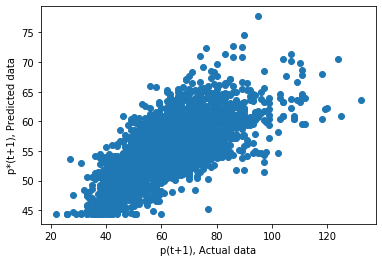

In [64]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)